<a href="https://colab.research.google.com/github/rioAgustian/Fisika-Komputasi/blob/main/scipy.odeint_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial Menyelesaikan Persamaan Diferensial dengan scipy.odeint**

**Rio Agustian Gilang Fernando**

**Jurusan Fisika**

**Fakultas matematika dan Ilmu Pengetahuan Alam**

**Universitas Negeri Semarang**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html 


In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

## **1. Persamaan Diferensial Biasa Orde-1**

Misalnya, dari hukum pendinginan Newton
\begin{align}
        \frac{dT}{dt}+k(T-T_{sekitar})=0
    \end{align}

Ubah persamaannya menjadi
\begin{align}
        \frac{dT}{dt}=-k(T-T_{sekitar})
    \end{align}

In [2]:
# model permasalahan
def dTdt(T, t):
  k = 1
  Ts = 31
  return -k*(T - Ts)

In [3]:
# kondisi awal
T0 = 100  # derajat celcius
t = np.linspace(0, 10, 1000)

In [4]:
# penggunaan odeint
sol = odeint(dTdt, y0=T0, t=t)
T = sol

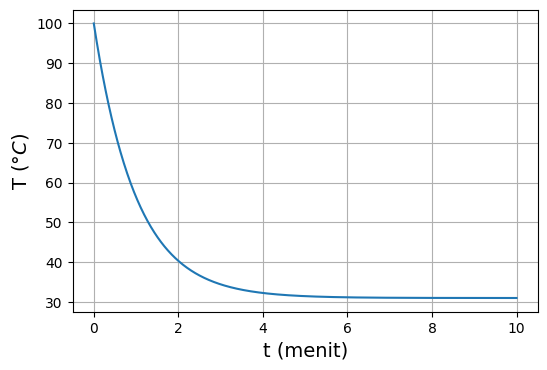

In [5]:
# plot grafik
plt.figure(dpi=100)
plt.plot(t, T)
plt.xlabel("t (menit)", fontsize=14)
plt.ylabel("T ($\degree C$)", fontsize=14)
plt.grid()
plt.show()

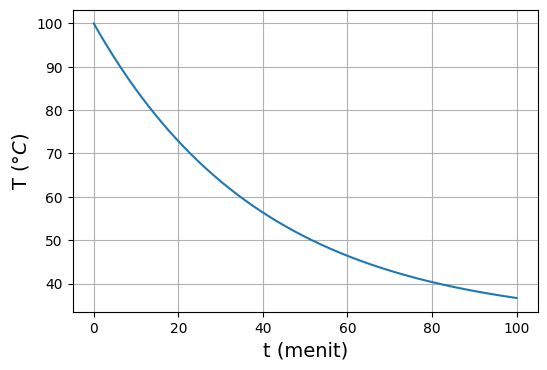

In [6]:
def dTdt(T, t, Ts, k):
  return -k*(T - Ts)

T0 = 100
t = np.linspace(0, 100, 1000)

T1 = odeint(dTdt, y0=T0, t=t, args=(31, 0.025))
T2 = odeint(dTdt, y0=T0, t=t, args=(31, 0.25))
T3 = odeint(dTdt, y0=T0, t=t, args=(31, 0.5))
T4 = odeint(dTdt, y0=T0, t=t, args=(31, 1))
T5 = odeint(dTdt, y0=T0, t=t, args=(31, 2))

plt.figure(dpi=100)
plt.plot(t, T1)
# plt.plot(t, T2)
# plt.plot(t, T3)
# plt.plot(t, T4)
# plt.plot(t, T5)
plt.xlabel("t (menit)", fontsize=14)
plt.ylabel("T ($\degree C$)", fontsize=14)
plt.grid()
plt.show()

## **2. Persamaan Diferensial Biasa Orde-1 Terkopel**

Misalnya, dari persamaan Lotka-Volterra (hubungan antara mangsa dan pemangsa)

\begin{align}
        \frac{dx}{dt} = 1.5x-0.03xy \\
        \frac{dy}{dt} = -0.5y+0.01xy
    \end{align}

Kita harus membuat persamaan yang inputnya 
\begin{align}
        S = (x, \,y)
    \end{align}

Dan keluarannya
\begin{align}
        \frac{dS}{dt} = (\frac{dx}{dt}, \,\frac{dy}{dt})
    \end{align}


In [7]:
# model permasalahan
def dSdt(S, t):
  x, y = S
  # x = S[0]
  # y = S[1]
  return [1.5*x - 0.03*x*y,
          -0.5*y + 0.01*x*y]

In [8]:
# kondisi awal
x0 = 100      # mangsa
y0 = 50       # pemangsa
S0 = (x0, y0)
t = np.linspace(0, 30, 1000)

In [9]:
# penyelesain dengan odeint
sol = odeint(dSdt, y0=S0, t=t)
# A adalah sebuah array
# A[baris, kolom]
# A[:, :]
# A[baris awal:baris akhir, kolom awal:kolom akhir]
x = sol[:, 0]
y = sol[:, 1]

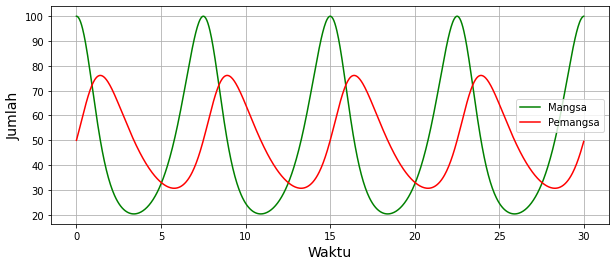

In [10]:
# plot grafik
plt.figure(figsize=(10, 4))
plt.plot(t, x, "green", label="Mangsa")
plt.plot(t, y, "red", label="Pemangsa")
plt.xlabel("Waktu", fontsize=14)
plt.ylabel("Jumlah", fontsize=14)
plt.legend()
plt.grid()
plt.show()

## **3. Persamaan Diferensial Biasa Orde-2** 

Misalnya, dari persamaan getaran teredam

\begin{align}
        \frac{d^2x}{dt^2}+\frac{b}{m}\frac{dx}{dt}+\frac{k}{m}x=0
    \end{align}

Ingat bahwa 1 PDB orde-2 dapat dipecah menjadi 2 PDB orde-1. Maksudnya, ini persamaan kita
\begin{align}
        \frac{d^2x}{dt^2}=-\frac{b}{m}\frac{dx}{dt}-\frac{k}{m}x
    \end{align}
Dapat dipecah menjadi
\begin{align}
        \frac{dx}{dt} &= v \\
        \frac{dv}{dt} &= -\frac{b}{m}v-\frac{k}{m}x
    \end{align}

In [11]:
# model permasalahan
def dSdt(S, t):
  b = 0.6
  m = 1
  k = 0.9
  x, v = S
  return [v,
          -b/m * v - k/m * x]

In [12]:
# kondisi awal
x0 = 0.2
v0 = 0
S0 = (x0, v0)
t = np.linspace(0, 30, 100)

In [13]:
# penyelesain dengan odeint
sol = odeint(dSdt, y0=S0, t=t)
x = sol[:, 0]
v = sol[:, 1]

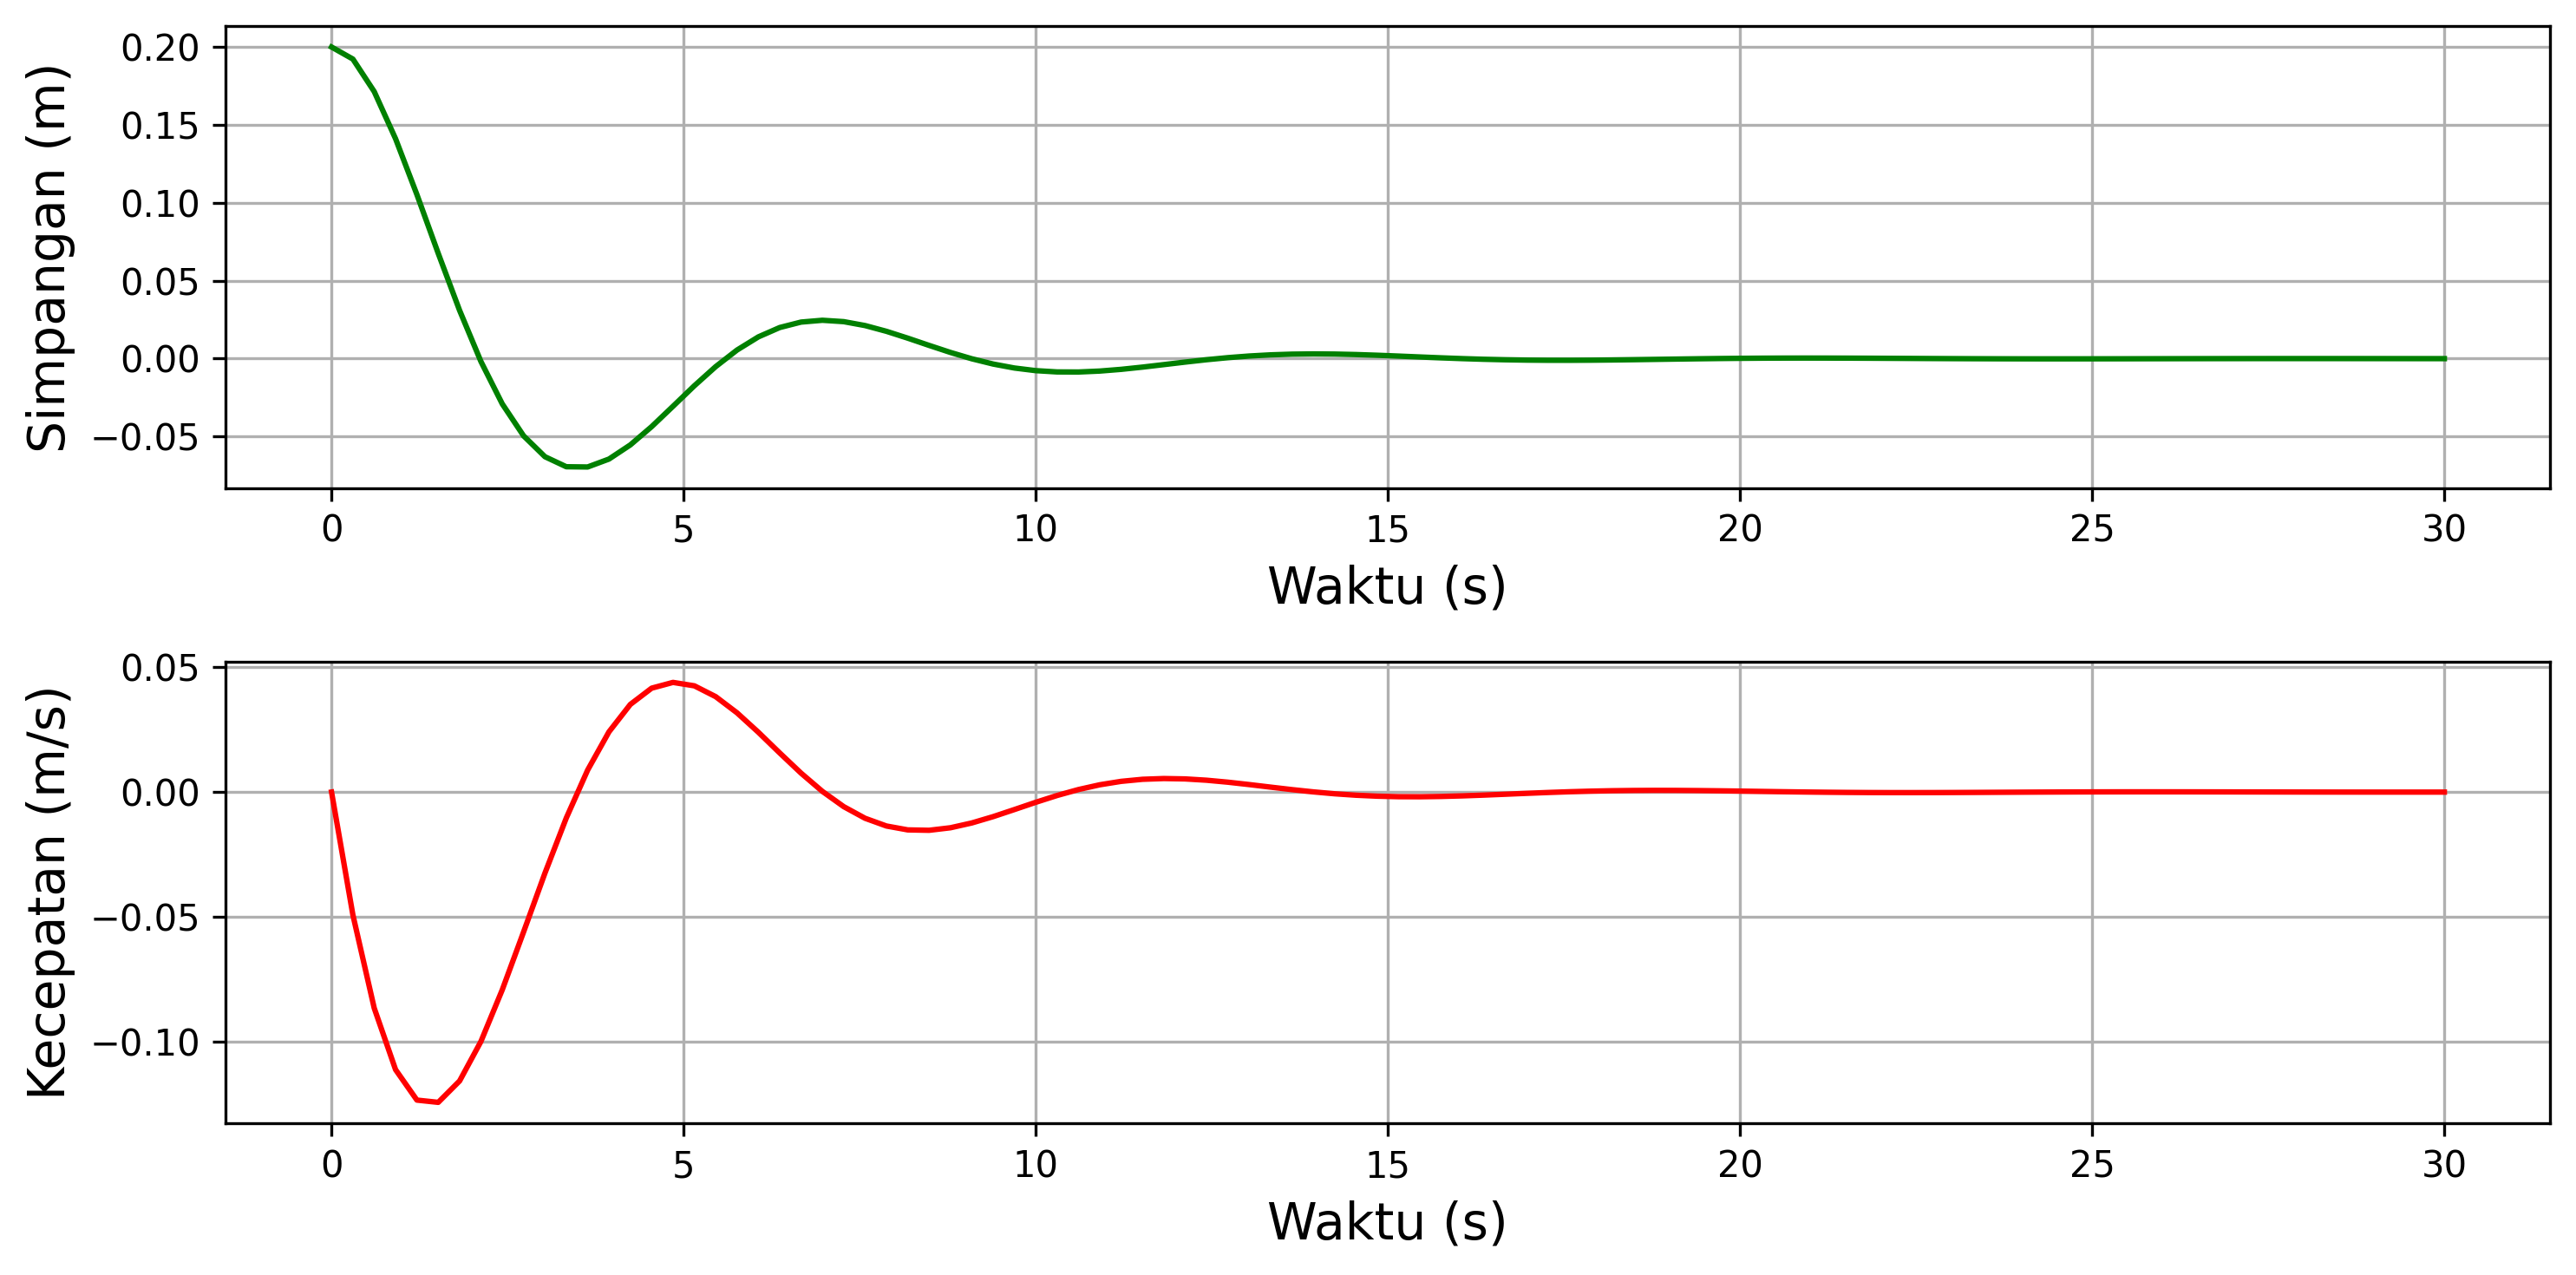

In [14]:
# plot
plt.figure(figsize=(10, 5), dpi=300)
plt.subplot(2, 1, 1)
plt.plot(t, x, "green")
plt.xlabel("Waktu (s)", fontsize=14)
plt.ylabel("Simpangan (m)", fontsize=14)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, v, "red")
plt.xlabel("Waktu (s)", fontsize=14)
plt.ylabel("Kecepatan (m/s)", fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()